# Hulse- Taylor

#### Import needed python modules

In [39]:
import numpy as np
from scipy import signal
import scipy.signal as sig
from scipy.interpolate import interp1d
from scipy.fftpack import fft, fftfreq,rfft, rfftfreq, irfft
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

## Template

In [40]:
#Open the file
template_HT= np.loadtxt('HTaylor_template_2022.csv')

template_HT.shape

(65536, 2)

Text(0, 0.5, 'Strain')

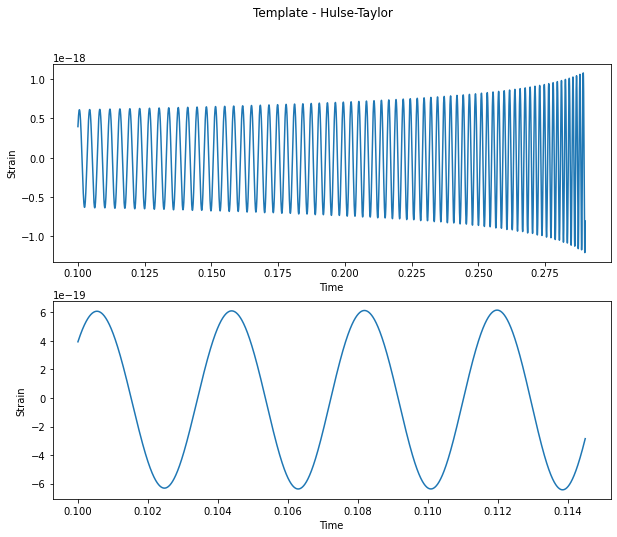

In [41]:
#plot the template - complete view and zoom of the first points
fig, (templ_1, templ_2) = plt.subplots(2, figsize=(10, 8))               # two plots (vertical axis)
templ_1.plot( template_HT[:,0],template_HT[:,1])                         #The data is a 65536x2 array. 
templ_2.plot(template_HT[:5000,0],template_HT[:5000,1])                  # Segment of the template
fig.suptitle('Template - Hulse-Taylor')                                  #Title of the figure
templ_1.set_xlabel("Time")                                    
templ_2.set_xlabel("Time")
templ_1.set_ylabel("Strain")
templ_2.set_ylabel("Strain")

In [42]:
#Introducing a python variable for the time and strain of the template 
template_HT_temp= template_HT[:,0]
template_HT_strain= template_HT[:,1]

In [43]:
#Windowing the template
window_HT= np.blackman(template_HT_strain.size)               # The argument is the number of points in the output window
windowed_template_HT= template_HT_strain*window_HT            # Convolution 

Text(0, 0.5, 'Strain')

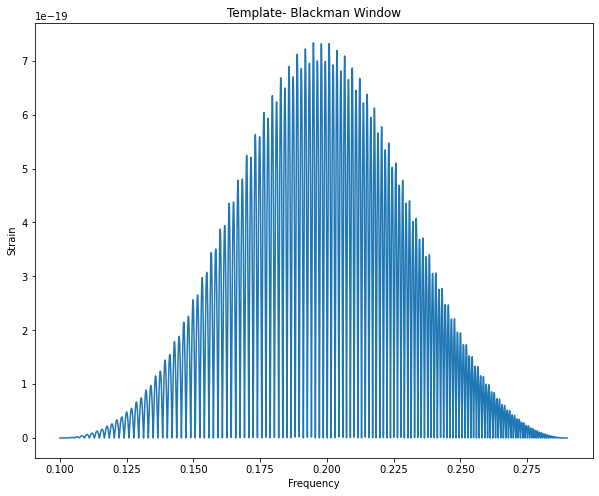

In [44]:
#Template with blackman window
plt.figure(figsize=(10,8))
plt.plot(template_HT_temp, abs(windowed_template_HT))
plt.title('Template- Blackman Window')
plt.xlabel('Frequency')
plt.ylabel('Strain')

In [45]:
#FFT of the template
fs_HT= 2 * 65536                                              # 2*B, with B= the maximum frequency of the sample (Hz)
fft_template_HT= rfft(windowed_template_HT, n=None)/fs_HT     
fftfreq_template_HT= rfftfreq(len(window_HT))*fs_HT 

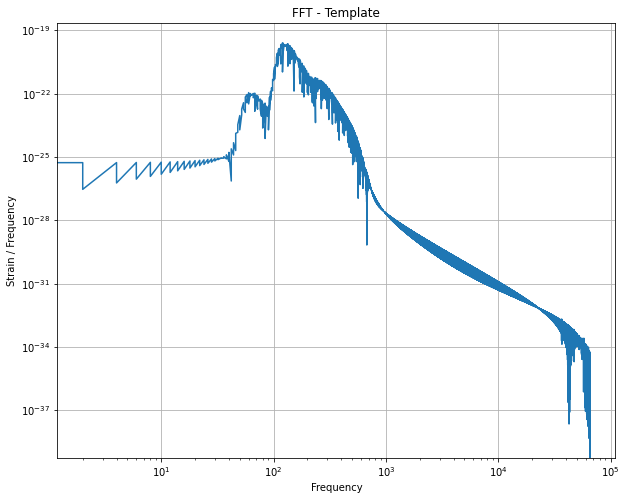

In [46]:
# Plot of the FFT
plt.figure(figsize=(10,8))
plt.loglog(fftfreq_template_HT, abs(fft_template_HT))                         
plt.grid('on')
plt.title('FFT - Template')
plt.xlabel('Frequency')
plt.ylabel('Strain / Frequency')
plt.savefig('HULT')

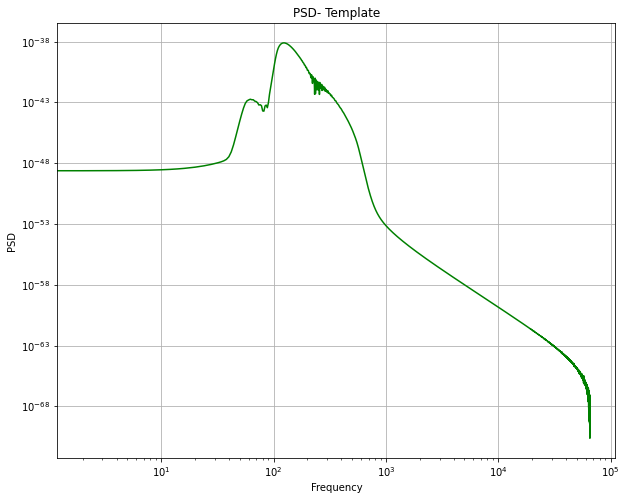

In [47]:
#PSD of the template
psd_template_HT, freq_psd_template_HT = mlab.psd(template_HT_strain, NFFT= 65536, Fs=fs_HT)

plt.figure(figsize=(10,8))
plt.loglog(freq_psd_template_HT, psd_template_HT, 'g')
plt.title('PSD- Template')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.grid('on')
plt.savefig('HPSD')

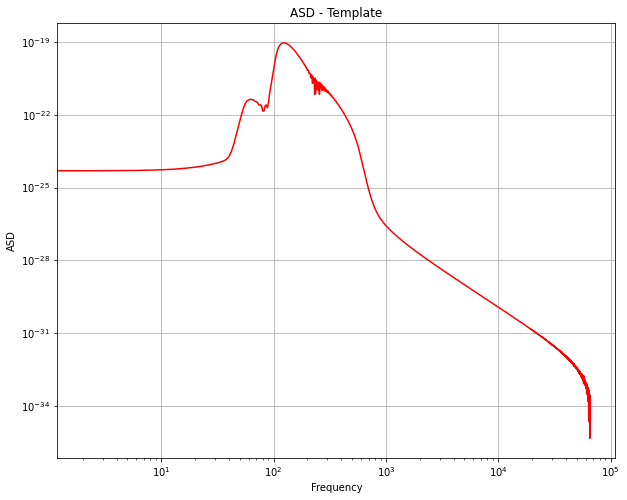

In [48]:
#ASD of the template
asd_template_HT= np.sqrt(psd_template_HT)

plt.figure(figsize=(10,8))
plt.loglog(freq_psd_template_HT, asd_template_HT, 'r')
plt.title('ASD - Template')
plt.xlabel('Frequency')
plt.ylabel('ASD')
plt.grid('on')
plt.savefig('HASD')

C:\Users\TATIAN~1\AppData\Local\Temp/ipykernel_37824/4248649329.py:3: UserWarning: Only one segment is calculated since parameter NFFT (=65536) >= signal length (=65536).
  espec_power_templ_HT, espec_freqs_templ_HT, bins, im = plt.specgram(template_HT_strain, NFFT= 65536, Fs=fs_HT, window= window_HT, cmap= 'inferno')


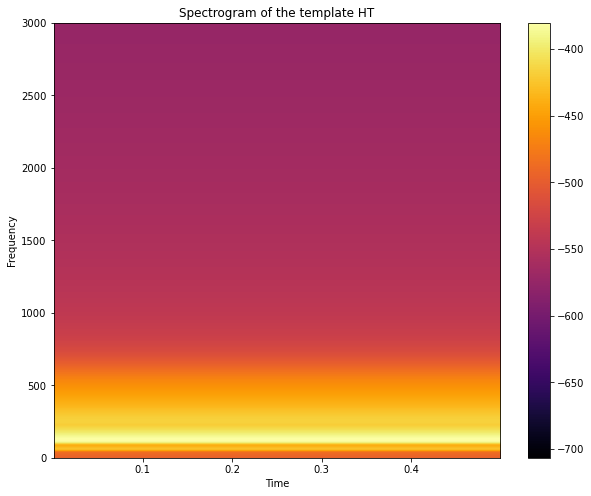

In [49]:
#Spectrogram of the template
plt.figure(figsize=(10,8))
espec_power_templ_HT, espec_freqs_templ_HT, bins, im = plt.specgram(template_HT_strain, NFFT= 65536, Fs=fs_HT, window= window_HT, cmap= 'inferno')
plt.title('Spectrogram of the template HT')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(0, 3000)
plt.colorbar()
plt.savefig('Hspec')

## Data

In [50]:
#Open the file
data= np.loadtxt('HTaylor_2022.csv')

Text(0, 0.5, 'Strain')

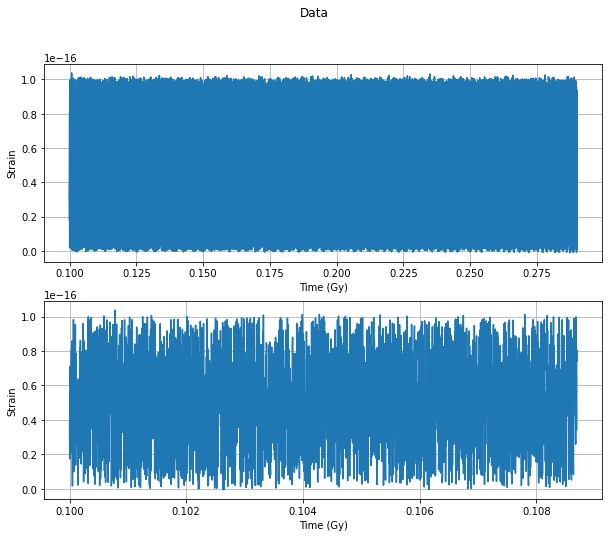

In [51]:
#Plot of the signal with noise
fig, (data_1, data_2)= plt.subplots(2, figsize=(10,8))
data_1.plot(template_HT[:,0], data)
data_2.plot(template_HT[:3000,0],data[:3000])
fig.suptitle('Data')
data_1.grid('on')
data_2.grid('on')
data_1.set_xlabel('Time (Gy)')
data_1.set_ylabel('Strain')
data_2.set_xlabel('Time (Gy)')
data_2.set_ylabel('Strain')

In [52]:
#Introducing a python variable for the time and strain of the data 
data_strain= data[:]
data_time= template_HT[:,0]

In [53]:
#windowing the data
window_data=np.blackman(data_strain.size)
windowed_data = data_strain*window_data

Text(0, 0.5, 'Strain')

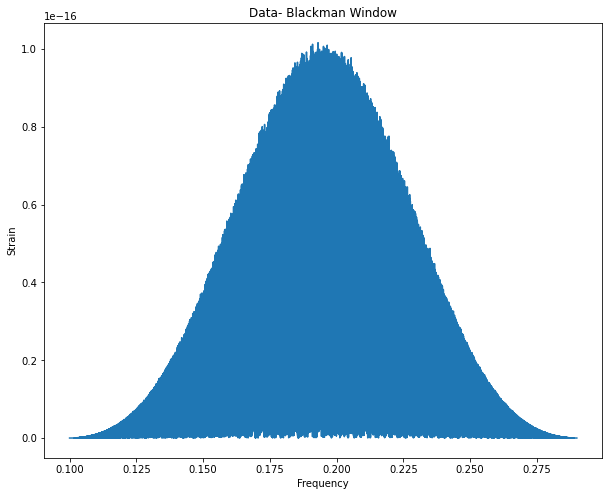

In [54]:
#Data with blackman window
plt.figure(figsize=(10,8))
plt.plot(data_time, abs(windowed_data))
plt.title('Data- Blackman Window')
plt.xlabel('Frequency')
plt.ylabel('Strain')

In [55]:
#performing the FFT of the data
fs_data= 2* 65536
fft_data= rfft(windowed_data)/ fs_data
fft_freq_data = rfftfreq(len(window_data))* fs_data

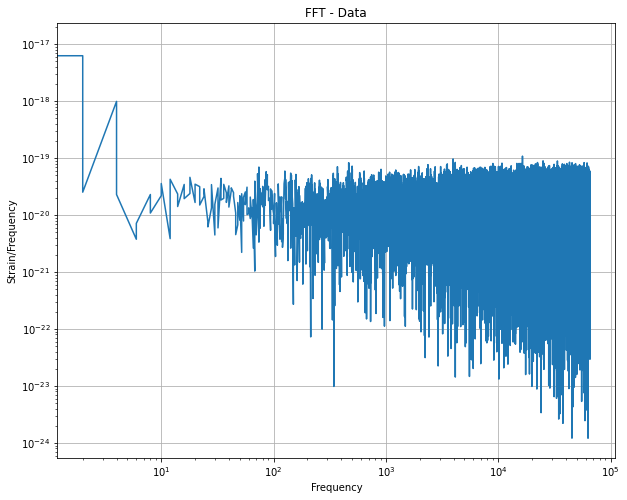

In [56]:
plt.figure(figsize=(10,8))
plt.loglog(fft_freq_data, abs(fft_data))
plt.grid('on')
plt.title('FFT - Data')
plt.xlabel('Frequency')
plt.ylabel('Strain/Frequency')
plt.savefig('HfftD')

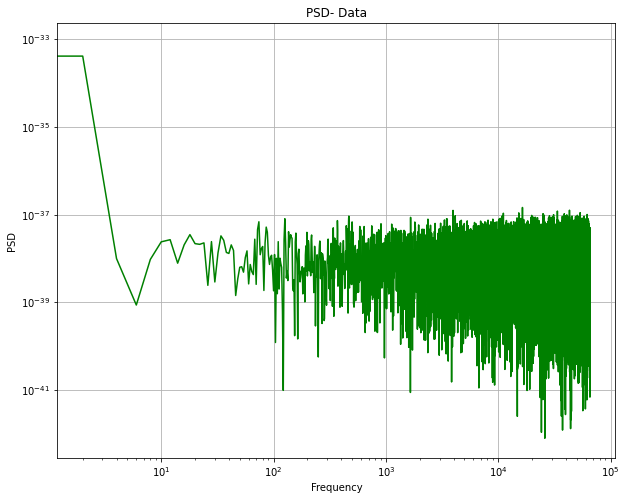

In [57]:
#PSD of the data
psd_data, freq_psd_data = mlab.psd(data_strain, NFFT=65536, Fs=fs_data)

plt.figure(figsize=(10,8))
plt.loglog(freq_psd_data, psd_data, 'g')
plt.title('PSD- Data')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.grid('on')
plt.savefig('HpsdD')

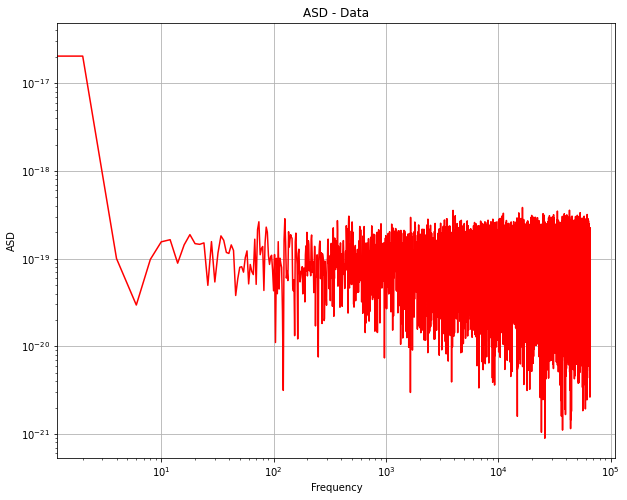

In [58]:
#ASD of the data
asd_data= np.sqrt(psd_data)

plt.figure(figsize=(10,8))
plt.loglog(freq_psd_data, asd_data, 'r')
plt.title('ASD - Data')
plt.xlabel('Frequency')
plt.ylabel('ASD')
plt.grid('on')
plt.savefig('HasdD')

C:\Users\TATIAN~1\AppData\Local\Temp/ipykernel_37824/692972137.py:3: UserWarning: Only one segment is calculated since parameter NFFT (=65536) >= signal length (=65536).
  espec_power_data, espec_freqs_data, bins, im = plt.specgram(data_strain, NFFT= 65536, Fs=fs_data, window= window_data, cmap= 'inferno')


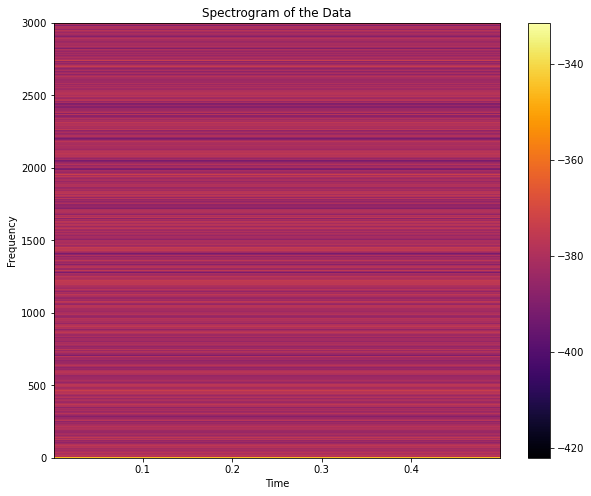

In [59]:
#Spectrogram of the data
plt.figure(figsize=(10,8))
espec_power_data, espec_freqs_data, bins, im = plt.specgram(data_strain, NFFT= 65536, Fs=fs_data, window= window_data, cmap= 'inferno')
plt.title('Spectrogram of the Data')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(0,3000)
plt.colorbar()
plt.savefig('HspecD')

## Signal Analysis

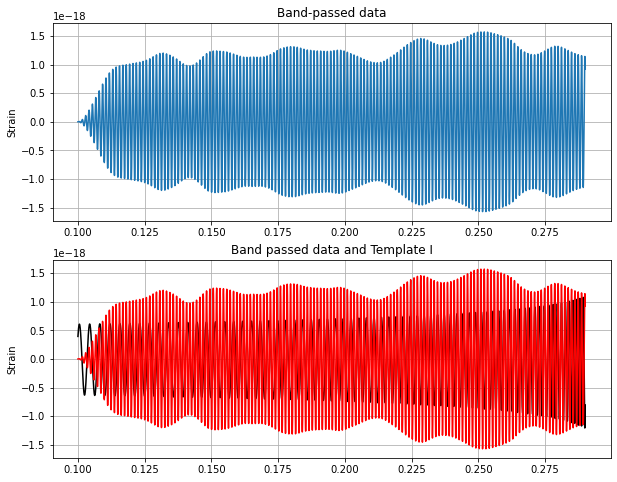

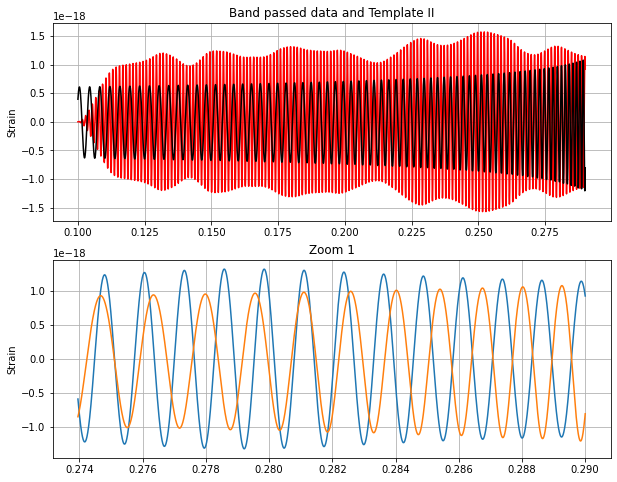

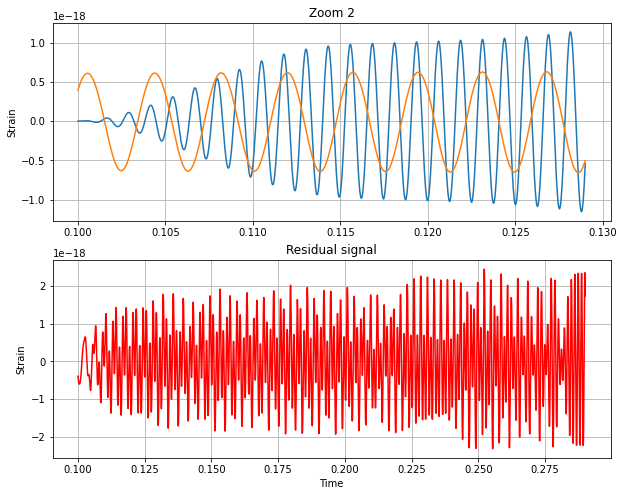

In [79]:
#Bandpass Filter
(B,A) = sig.butter(3, [291/(fs_data/2.0), 305/(fs_data/2.0)], btype='pass')    
data_pass= sig.lfilter(B, A, data)  

#Plot of the band-passed signal
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(data_time, data_pass)
plt.title('Band-passed data')
plt.ylabel('Strain')
plt.grid('on')


#Plot the comparison of the filtered signal with the template (template in the background)
plt.subplot(2,1,2)
plt.plot(template_HT_temp,template_HT_strain,'k')
plt.plot(data_time,data_pass,'r')
plt.title('Band passed data and Template I')
plt.ylabel('Strain')
plt.grid('on')

#Plot the comparison of the filtered signal with the template (template on the front)
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(data_time,data_pass,'r')
plt.plot(template_HT_temp,template_HT_strain,'k')
plt.title('Band passed data and Template II')
plt.ylabel('Strain')
plt.grid('on')

#Zoom of the end
plt.subplot(2,1,2)
plt.subplot(2,1,2)
plt.plot(template_HT[60000:,0],data_pass[60000:])
plt.plot(template_HT[60000:,0],template_HT[60000:,1])
plt.title('Zoom 1')
plt.ylabel('Strain')
plt.grid('on')

#Zoom of the beginning
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(template_HT[:10000,0],data_pass[:10000])
plt.plot(template_HT[:10000,0],template_HT[:10000,1])
plt.title('Zoom 2')
plt.ylabel('Strain')
plt.grid('on')

#Residual signal - Extracted noise 
plt.subplot(2,1,2)
plt.plot(data_time,data_pass-template_HT_strain,'r')
plt.title('Residual signal')
plt.ylabel('Strain')
plt.xlabel('Time')
plt.grid('on')

C:\Users\TATIAN~1\AppData\Local\Temp/ipykernel_37824/394515017.py:3: UserWarning: Only one segment is calculated since parameter NFFT (=65536) >= signal length (=65536).
  espec_power_data2, espec_freqs_data2, bins, im = plt.specgram(data_pass, NFFT=65536, Fs=fs_HT, window= window_data, cmap= 'inferno')


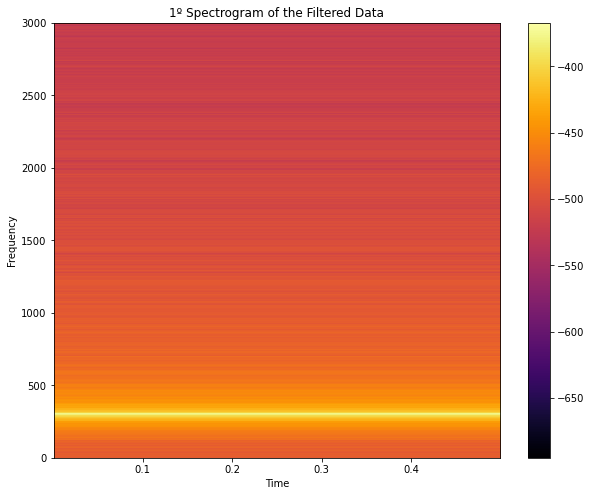

In [80]:
#Spectrogram of the data
plt.figure(figsize=(10,8))
espec_power_data2, espec_freqs_data2, bins, im = plt.specgram(data_pass, NFFT=65536, Fs=fs_HT, window= window_data, cmap= 'inferno')
plt.title('1º Spectrogram of the Filtered Data')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(0,3000)
plt.colorbar()
plt.savefig('SpecII')